# Orenstein-Uhlenbeck Process

Process $(X_t: t\geq 0)$ is a diffusion process with generator: $$ (\cal{Lf})(x) = -\alpha x f'(x) + \frac{1}{2} \sigma^2 f''(x), \  \alpha, \sigma^2 >0 $$

Given a function $f(X_t)$ we can calculate the **expectation value** via

$\frac{d}{dt}E[f(X_t)]=E[(Lf)(X_t)]\qquad$ 

**Fokker-Planck Representation:** $\frac{\partial \pi_t(y)}{\partial t}=-\alpha \frac{\partial}{\partial y}(y\pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}\pi_t(y)$

This represents Orenstein-Uhlenbeck as a drift + diffusion term.

In general the Fokker-Planck equation is a master equation of the form: $$ \frac{\partial \pi_t(y)}{\partial t}= -\frac{\partial}{\partial y}(A(y) \pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}B(y) \pi_t(y)$$

Where $B(y)>0$. The FPE is linear is $A = A_0 + A_1y$ is a linear function of $y$ and $B$ is constant. If $A_1<0$ then the stationary solution is Guassian. 

# Simulation

The **Ornstein–Uhlenbeck process** may also be described by a **stochastic differential equation**. The SDE shows the link between the stochastic and determinisitc parts.

$dX_t=-\alpha X_t dt + \sigma dW_t$

where $dX_t$ and $dt$ are infinitesimally small and $dW_t \sim N(0,dt)$ is the Wiener increment which is normally distributed with zero mean and variance $dt$.

If we use a simple finite difference approximation we have: $ X_{t+\Delta t}=X_t -\alpha X_t \Delta t+ \sigma \Delta W_t$
where $\Delta W_t \sim N(0,\Delta t)$

To numerically integrate a SDE, we need to install [sdeint](https://pypi.org/project/sdeint/), `sudo pip3 install sdeint`

**Lets simulate!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint #need to install this on your laptops: sudo pip3 install sdeint. Stocahastic diff equation solver. Easier way to do this. 

In [21]:
##### Parameter/setup ######

alpha=1
sigma=1
x0=5 # initial condition

tmax=10.0 #max time

np.random.seed(101) # for reproducability 

############################


def simulate(timestep):
    
    times=np.arange(0.0,tmax,dt) # vector of times
    length=np.shape(times)[0] # Number of timesteps
    x=np.zeros(length) # vector to store x values
    x[0]=x0

    B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise. Builds an array of random numbers in distr]ibution, not necessary to do it this way.

    for i in range(0,length-1): # simulate
        x[i+1]=x[i]-alpha*x[i]*dt+sigma*B[i] # Can just draw a random number here every time, remember to mutiply by np.sqrt(dt)
    
    return times, x

times_1, xs_1 = simulate(0.1)
times_2, xs_2 = simulate(0.01)




Text(0.5,1,'Ornstein-Uhlenbeck process with $\\alpha$ = 1, $\\sigma$ = 1.')

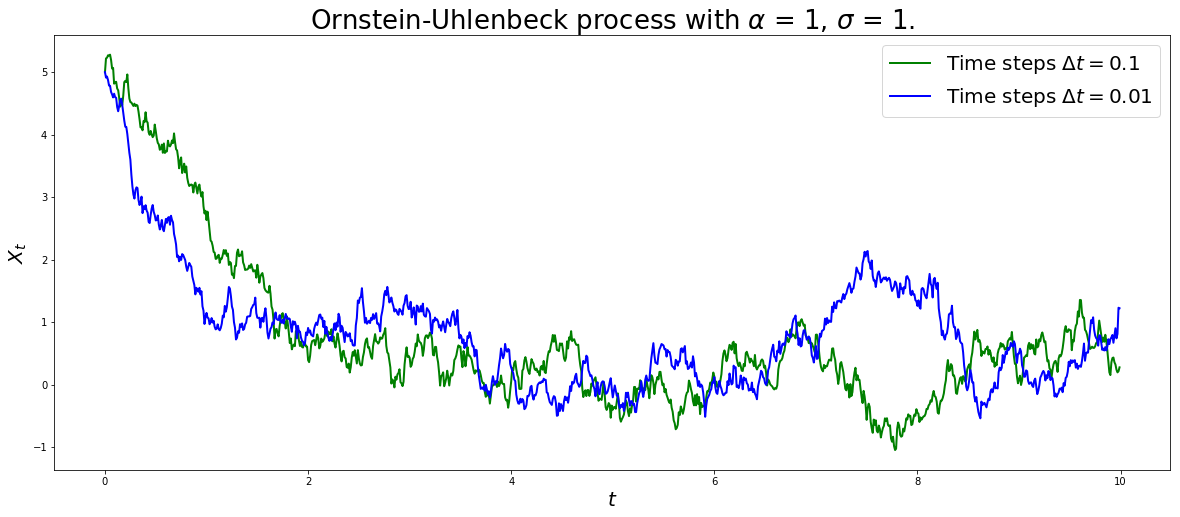

In [34]:
plt.figure(figsize = (20,8))
plt.plot(times_1,xs_1,'green',lw=2, label=r"Time steps $\Delta t = 0.1$")
plt.plot(times_2,xs_2,'blue',lw=2, label=r"Time steps $\Delta t = 0.01$")
plt.legend(fontsize=20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$X_t$', fontsize = 20)
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma), fontsize = 26)

# Numerically Integrate

For Itos equation: $dy = f(y,t)dt + G(y,t) dW$.

In this example, $f(X_t,t) = - \alpha X_t$ and $G(X_t,t) = \sigma$

In [10]:
# This is with the sde package
# Good way to check if you have done the right thing
# Won't ba exactly the same due to random numbers
# alpha = 0, sigma = 1 will give Brownian motion

# Is this the drift??? 
def f(x,t):
    return -alpha*x

# Generator function??
def G(x,t):
    return sigma

In [11]:
result = sdeint.itoint(f,G, x0, times)

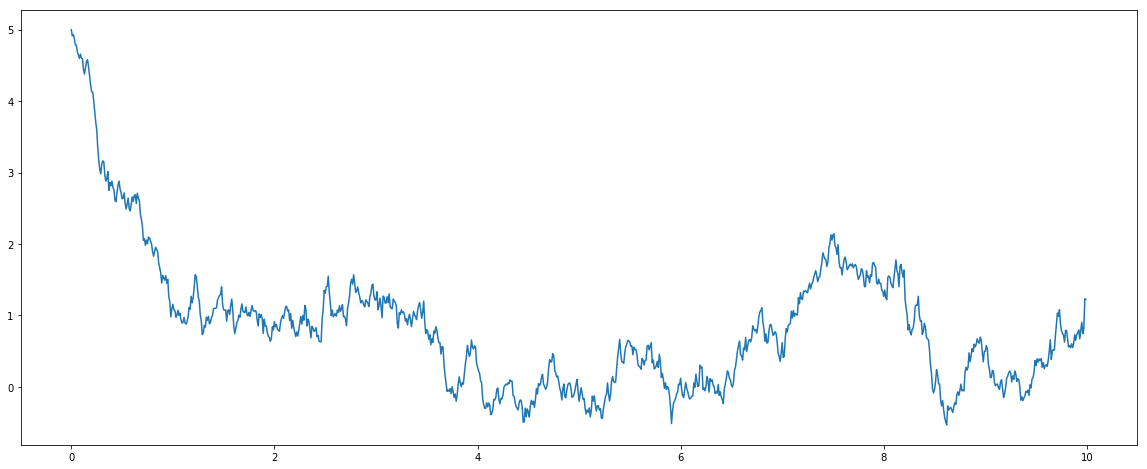

In [12]:
plt.figure(figsize = (20,8))
plt.plot(times, result)